Get Dataset

In [3]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()

print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# independent features
X = pd.DataFrame(dataset['data'],columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
y = dataset['target']

Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

Hyperparameter Tuning (Preprunning)

In [15]:
params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5,10,15,20,25],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
regressor=DecisionTreeRegressor()
grid = GridSearchCV(regressor, param_grid=params, cv=5, scoring='neg_mean_squared_error')

In [18]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

Visualize Tree

[Text(0.5, 0.875, 'x[2] <= 0.005\nfriedman_mse = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.625, 'x[7] <= 0.031\nfriedman_mse = 3636.316\nsamples = 183\nvalue = 118.355'),
 Text(0.125, 0.375, 'x[0] <= 0.029\nfriedman_mse = 2752.467\nsamples = 143\nvalue = 105.315'),
 Text(0.0625, 0.125, 'friedman_mse = 2572.863\nsamples = 106\nvalue = 97.33'),
 Text(0.1875, 0.125, 'friedman_mse = 2561.126\nsamples = 37\nvalue = 128.189'),
 Text(0.375, 0.375, 'x[5] <= 0.097\nfriedman_mse = 4014.724\nsamples = 40\nvalue = 164.975'),
 Text(0.3125, 0.125, 'friedman_mse = 3894.629\nsamples = 38\nvalue = 160.947'),
 Text(0.4375, 0.125, 'friedman_mse = 132.25\nsamples = 2\nvalue = 241.5'),
 Text(0.75, 0.625, 'x[3] <= 0.024\nfriedman_mse = 5295.789\nsamples = 126\nvalue = 205.532'),
 Text(0.625, 0.375, 'x[6] <= -0.075\nfriedman_mse = 4989.722\nsamples = 65\nvalue = 179.431'),
 Text(0.5625, 0.125, 'friedman_mse = 841.0\nsamples = 2\nvalue = 288.0'),
 Text(0.6875, 0.125, 'friedman_mse = 4735.349\n

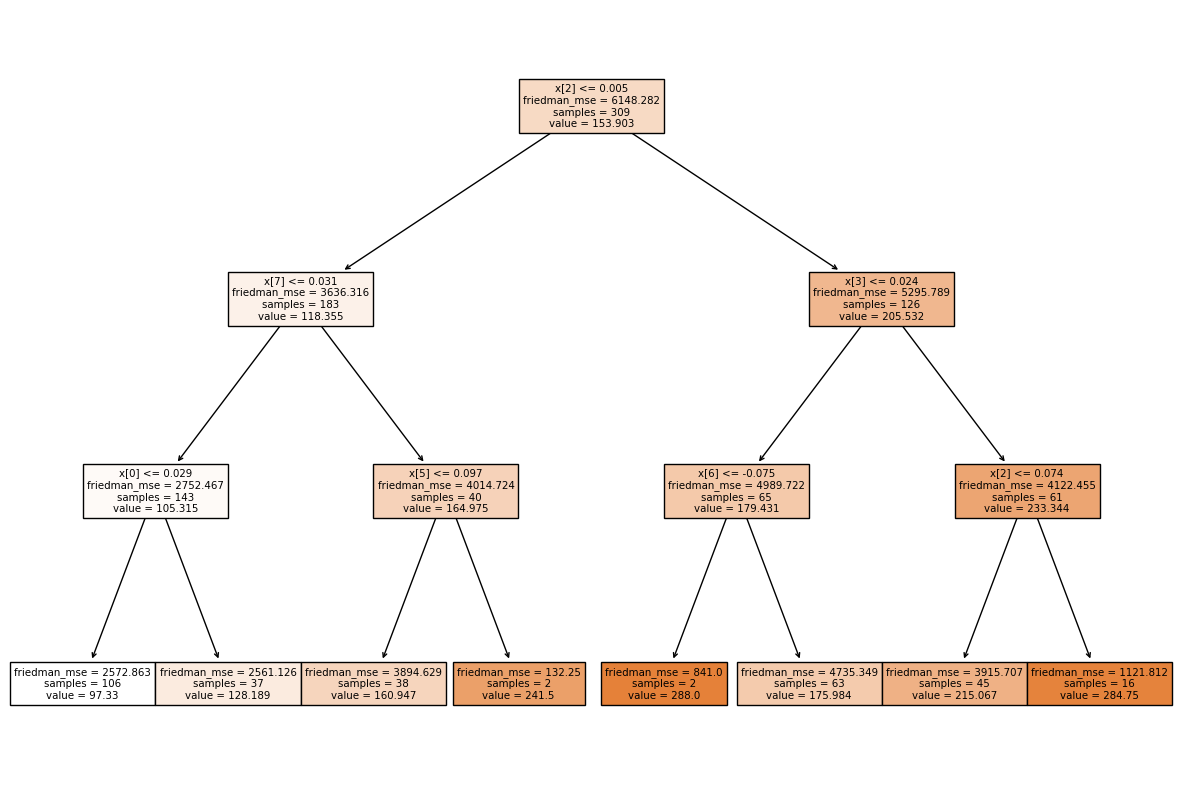

In [22]:
regressor=DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, max_features='sqrt',splitter='best')
regressor.fit(X_train,y_train)


from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor, filled=True)